In [72]:
pip install tensorflow_decision_forests 

Note: you may need to restart the kernel to use updated packages.


In [73]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [74]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [75]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [76]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [77]:
dataset_df = dataset_df.drop('Id', axis=1)

In [78]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [79]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_85154/318364108.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);
/tmp/ipykernel_85154/318364108.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, h

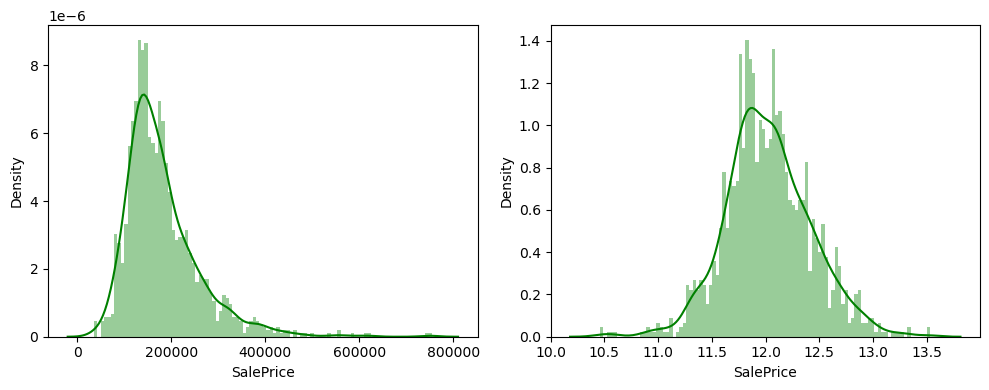

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);

dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log1p(x))

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[1])

plt.tight_layout()
plt.show()



### Change the type of the variable to the right one:

In [81]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [82]:
list(set(dataset_df.dtypes.tolist()))


[dtype('O'), dtype('float64'), dtype('int64')]

### Create the data set of only numerical columns:

In [83]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247699
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109016
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317171
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849405
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429220


### Check how many NaN in the numerical columns:

In [84]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Check the correlation between each variable VS SalePrice:

<Axes: >

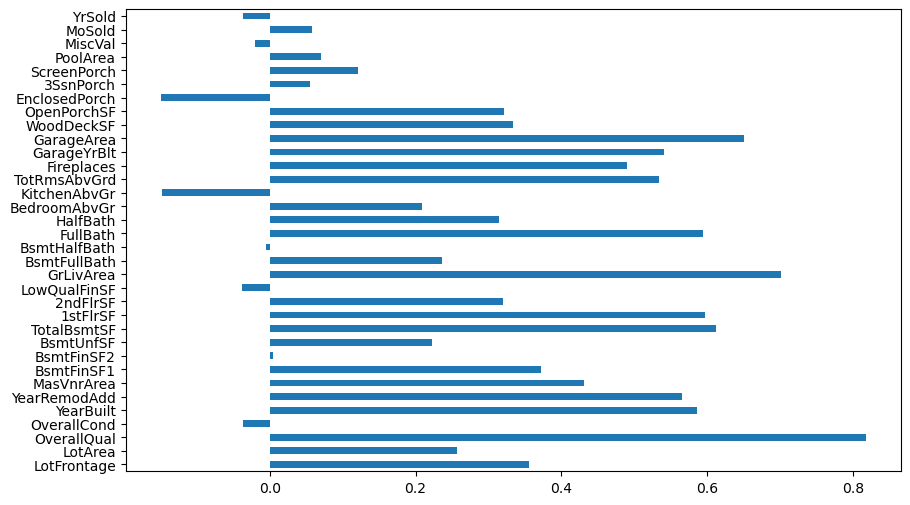

In [85]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

### View the distribution of each numerical variable:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

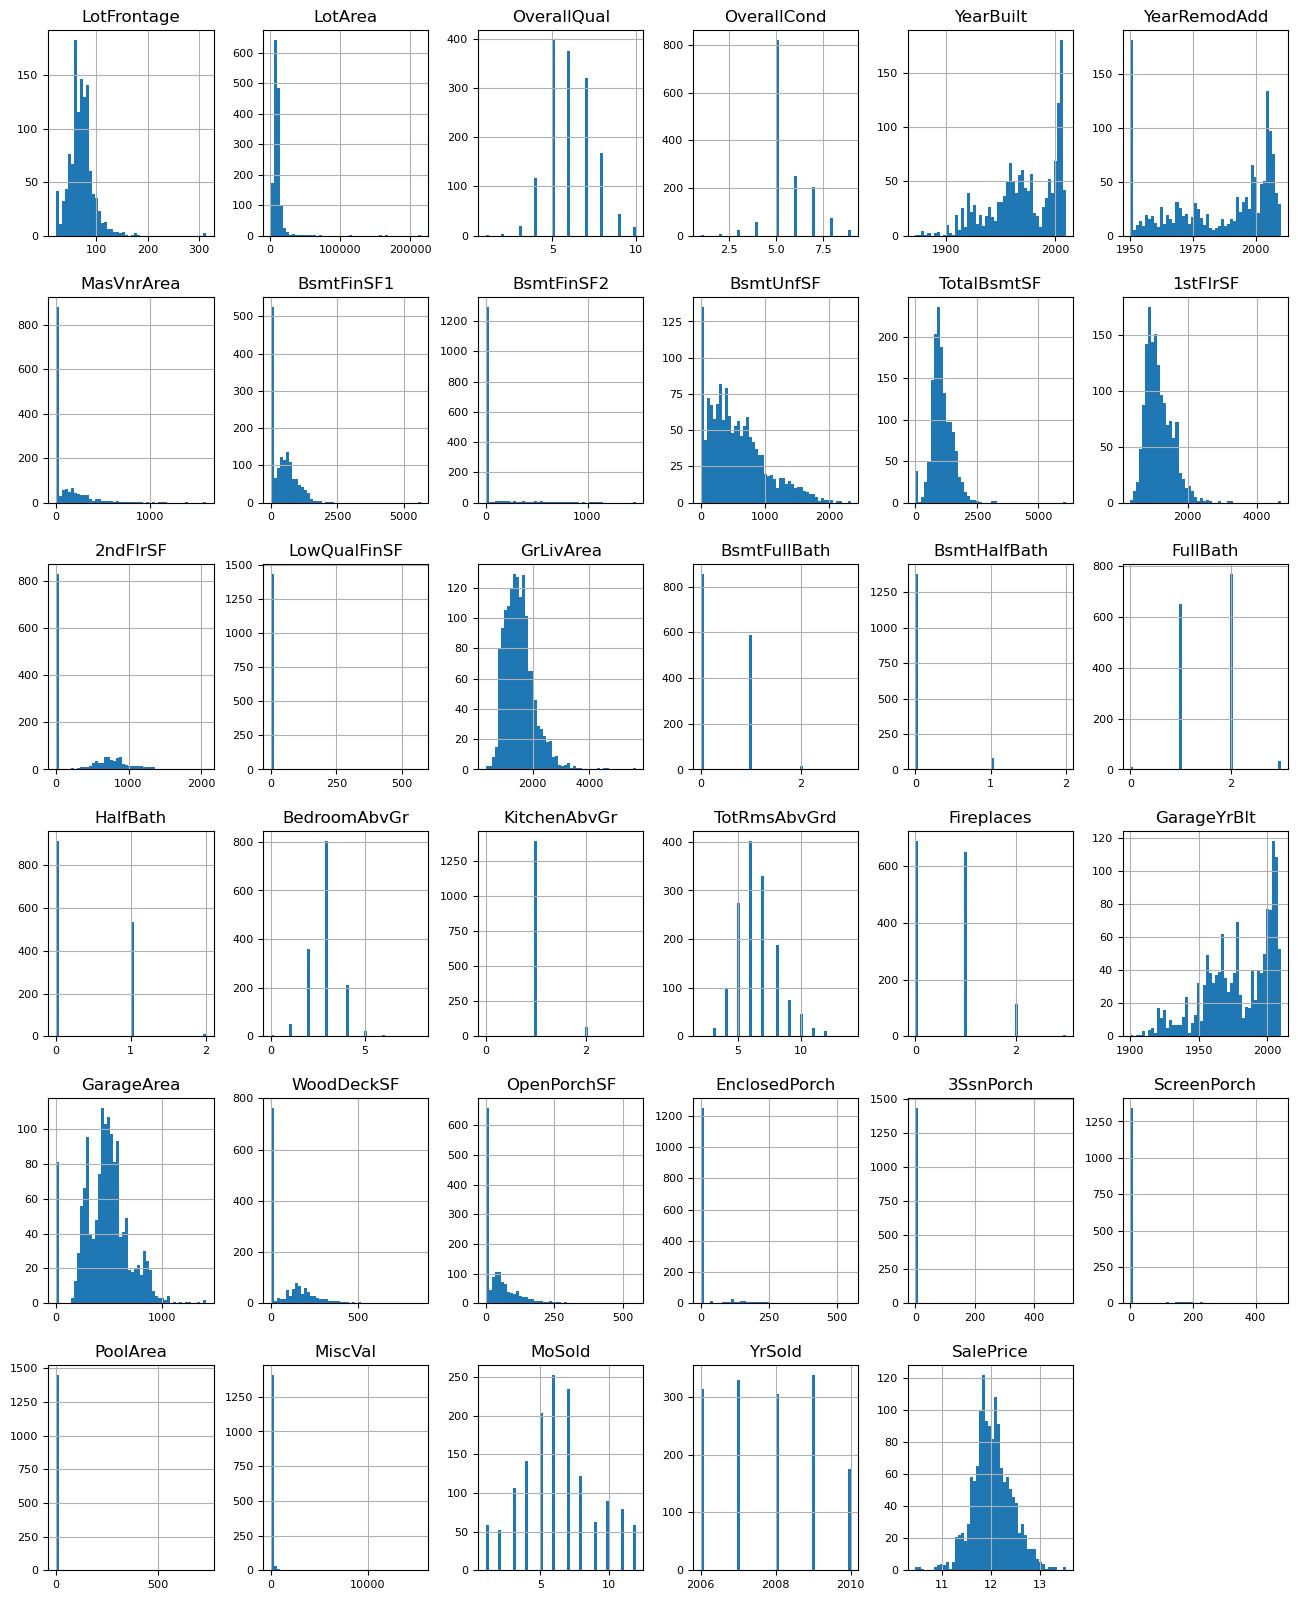

In [86]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


### Check how many NaN values in the complete dataset:

In [87]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

NaN values remaining: 7829
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [88]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
242,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.277216
1201,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,12.195522
1319,20,RL,75.0,10215,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,11.617294
823,50,RL,60.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,11.845827
1239,20,RL,64.0,9037,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,12.490879
714,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,11.779136
267,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,12.097936
50,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,12.083911
986,50,RM,59.0,5310,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,11.669938
912,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,620,7,2006,WD,Abnorml,11.385103


### Create new better columns GarageAgeAtSale and HouseAgeAtSale and remove old one:

In [89]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

### Create new better columns BsmtBath and Bath and remove old ones:

In [90]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

### Change columns categorical into ordinal:

In [91]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_85154/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [92]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_85154/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_85154/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_85154/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [93]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_85154/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_85154/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_85154/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

### Remove not important columns (related to inspector.variable_importances):

In [94]:
dataset_df = dataset_df.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

In [95]:
dataset_df = dataset_df.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

In [96]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1201 non-null   float64
 3   LotArea          1460 non-null   int64  
 4   Street           1460 non-null   object 
 5   Utilities        1460 non-null   object 
 6   Neighborhood     1460 non-null   object 
 7   OverallQual      1460 non-null   int64  
 8   OverallCond      1460 non-null   int64  
 9   YearBuilt        1460 non-null   int64  
 10  YearRemodAdd     1460 non-null   int64  
 11  Exterior1st      1460 non-null   object 
 12  Exterior2nd      1460 non-null   object 
 13  MasVnrArea       1452 non-null   float64
 14  ExterQual        1460 non-null   object 
 15  BsmtQual         1423 non-null   float64
 16  BsmtCond         1423 non-null   float64
 17  BsmtExposure  

In [97]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,...,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,SalePrice,HouseAgeAtSale,GarageAgeAtSale,BsmtBath,Bath
384,60,RL,NaN,53107,Pave,AllPub,ClearCr,6,5,1992,...,0,NaN,NaN,0,6,12.388398,15.0,15.0,1.0,2.5
1453,20,RL,90.0,17217,Pave,AllPub,Mitchel,5,5,2006,...,0,NaN,NaN,0,7,11.344519,0.0,NaN,0.0,1.0
416,60,RL,74.0,7844,Pave,AllPub,Sawyer,6,7,1978,...,0,NaN,NaN,0,3,11.915058,28.0,28.0,0.0,1.5
344,160,RM,36.0,2592,Pave,AllPub,MeadowV,5,3,1976,...,0,NaN,NaN,0,4,11.350418,34.0,34.0,0.0,1.5
1458,20,RL,68.0,9717,Pave,AllPub,NAmes,5,6,1950,...,0,NaN,NaN,0,4,11.864469,60.0,60.0,1.0,1.0
450,30,RM,70.0,5684,Pave,AllPub,OldTown,6,8,1930,...,0,NaN,NaN,0,6,11.608245,76.0,74.0,0.0,1.0
328,75,RL,NaN,11888,Pave,AllPub,BrkSide,6,6,1916,...,0,NaN,NaN,0,7,12.276070,93.0,79.0,0.0,2.0
1131,20,RL,63.0,10712,Pave,AllPub,Mitchel,5,5,1991,...,0,NaN,NaN,0,9,11.445727,16.0,NaN,0.0,1.0
605,60,RL,85.0,13600,Pave,AllPub,NAmes,7,6,1965,...,0,NaN,NaN,0,10,12.230770,44.0,44.0,0.0,2.5
86,60,RL,122.0,11911,Pave,AllPub,Gilbert,6,5,2005,...,0,NaN,NaN,0,3,12.066816,4.0,4.0,0.0,2.5


In [98]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 3680


### In categorical columns, put all rare categories into one unique category "Other":

In [99]:
threshold = dataset_df.shape[0] * 0.005  # nombre minimum d'occurrences pour ne pas être rare

# Boucle sur toutes les colonnes de type object (catégorielles)
for col in dataset_df.select_dtypes(include=['object']).columns:
    counts = dataset_df[col].value_counts()
    rare_cats = counts[counts < threshold].index
    dataset_df[col] = dataset_df[col].replace(rare_cats, "Other")


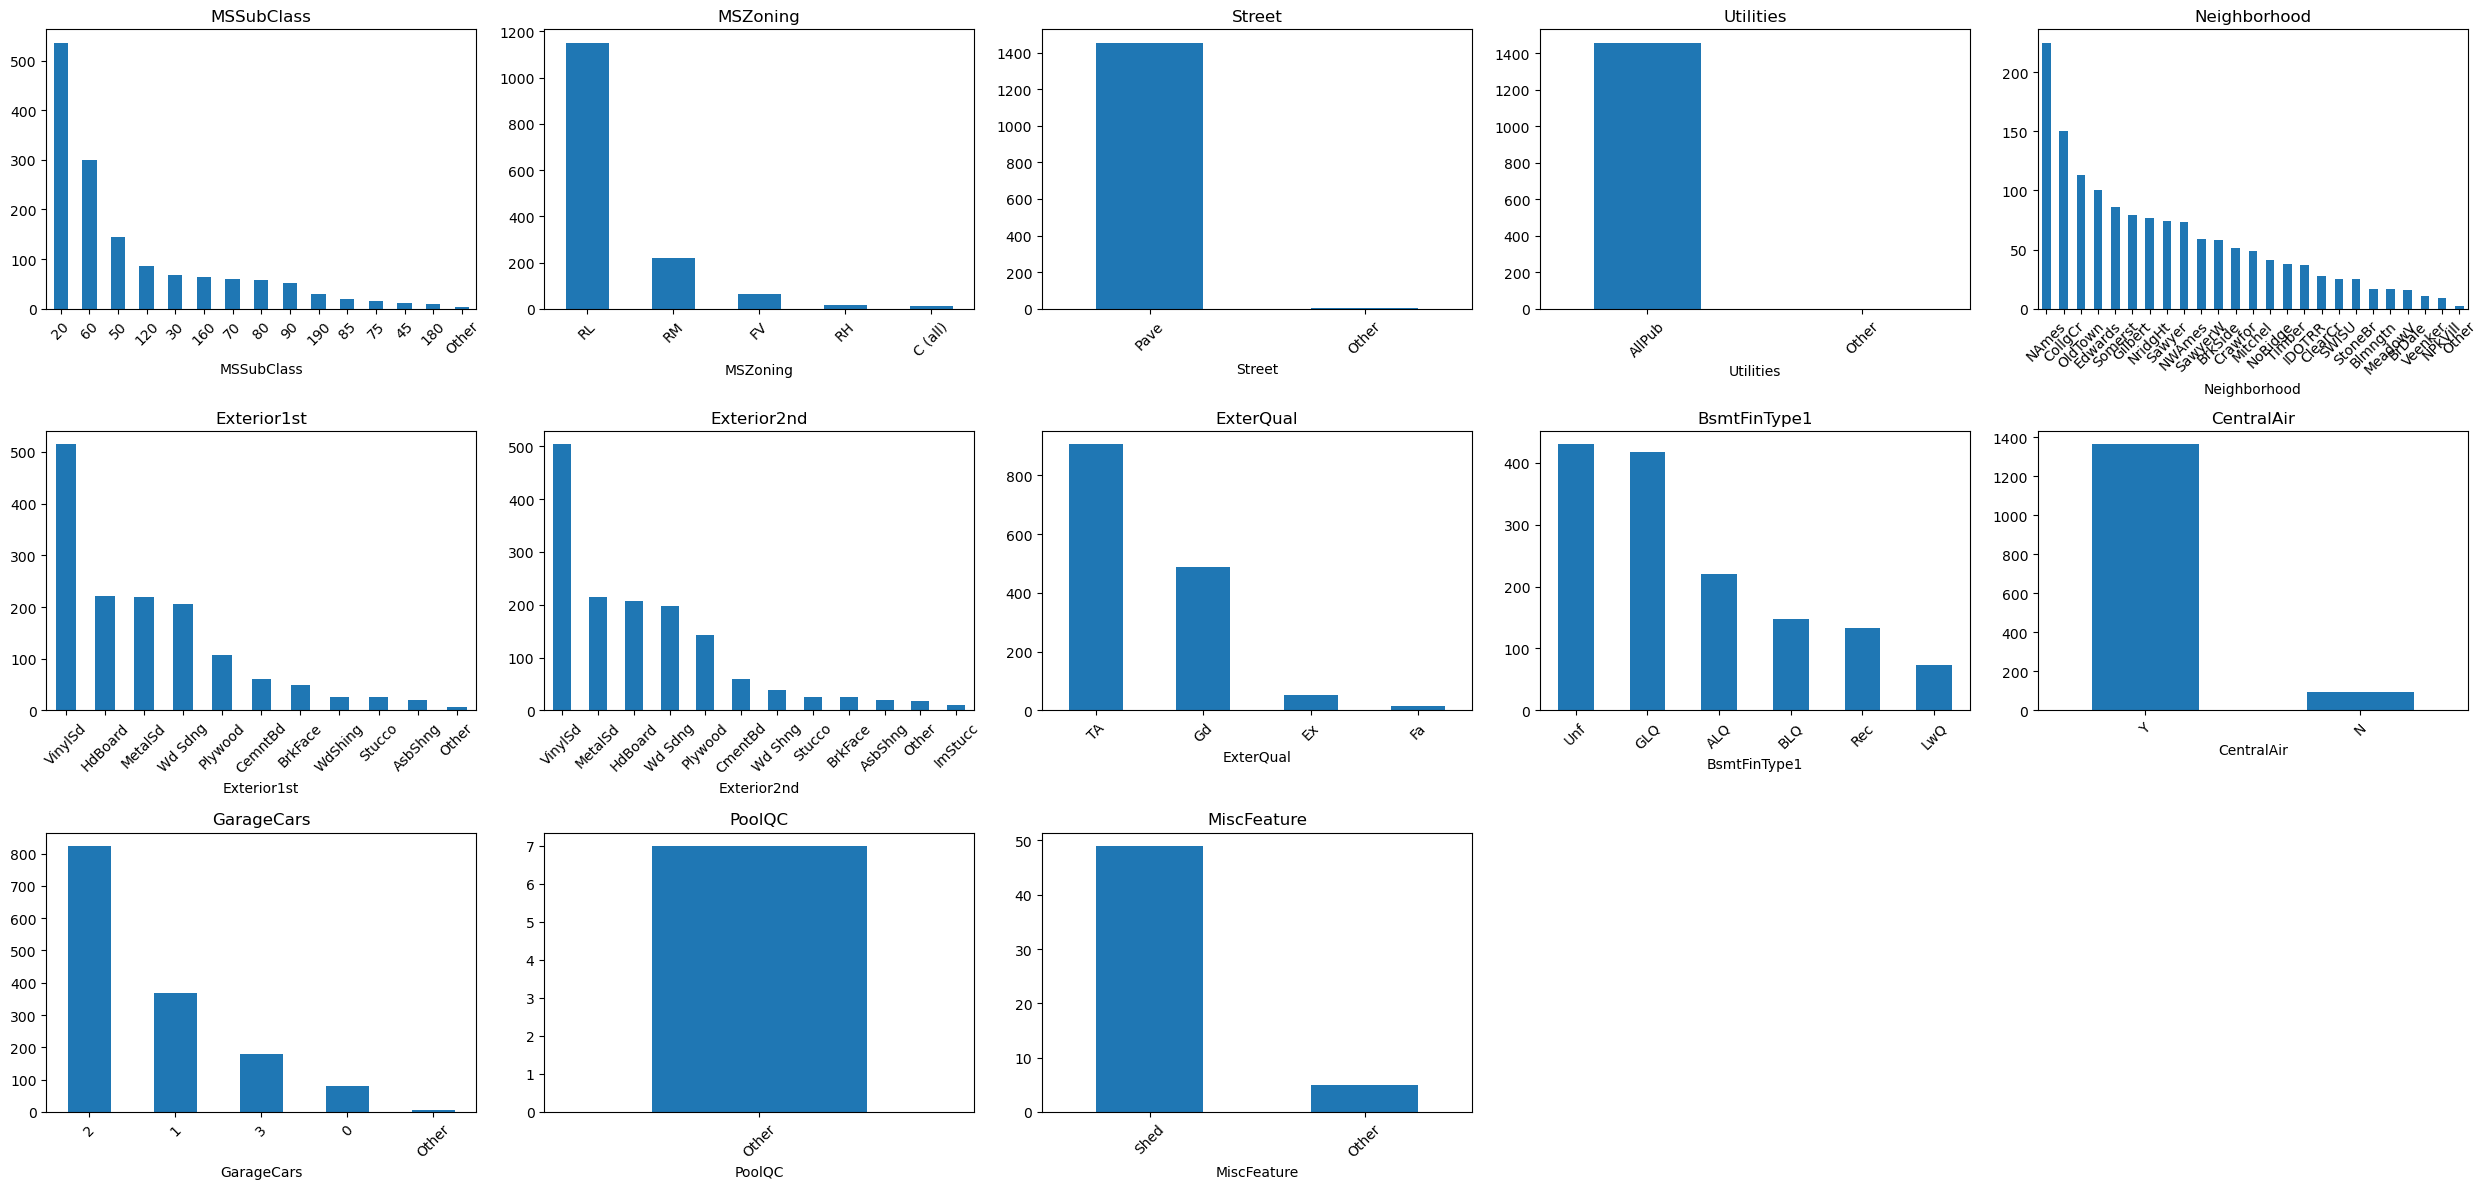

In [100]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


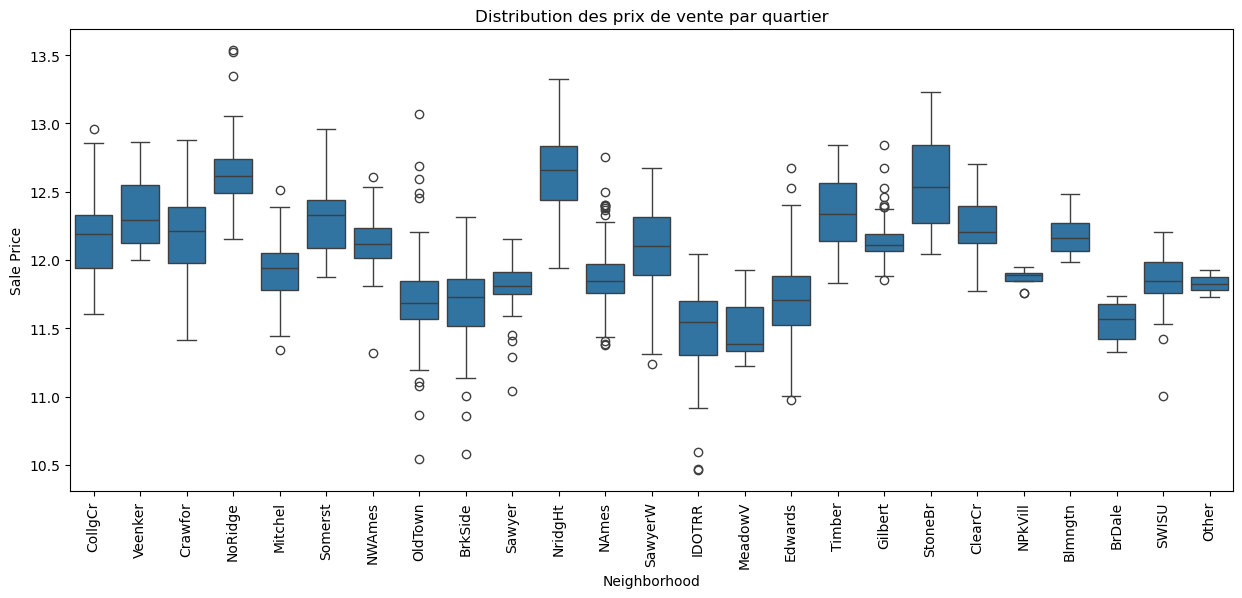

In [101]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=dataset_df)
plt.xticks(rotation=90)
plt.title("Distribution des prix de vente par quartier")
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
plt.show()

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpt9x6ibjz as temporary training directory


I0000 00:00:1757009449.978524   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757009449.978680   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757009449.978701   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757009449.978856   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757009449.978866   85154 kernel.cc:402] Number of examples: 1157
I0000 00:00:1757009449.979586   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757009449.979677   85154 data_spec_inference.cc:354] 1 item(s) have been pr

1/1 [==============================] - 0s 101ms/step
Quartiers en train : ['Veenker' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes' 'OldTown' 'BrkSide'
 'Sawyer' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'Edwards' 'Timber'
 'Gilbert' 'ClearCr' 'NPkVill' 'Blmngtn' 'BrDale' 'SWISU' 'Other']
Quartiers en test  : ['CollgCr' 'Crawfor' 'NridgHt' 'StoneBr']
Nombre d'échantillons train : 1157
Nombre d'échantillons test  : 303
Fold 1 → RMSE Train: 15767.35 | RMSE Test: 32692.04
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmph6h_fkp8 as temporary training directory


I0000 00:00:1757009455.041582   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757009455.041640   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757009455.041658   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757009455.041781   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757009455.041788   85154 kernel.cc:402] Number of examples: 1032
I0000 00:00:1757009455.042338   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Exterior1st (10 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757009455.042390   85154 data_spec_inference.cc:354] 1 item(s) have been 

1/1 [==============================] - 0s 105ms/step
Quartiers en train : ['CollgCr' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes' 'OldTown'
 'Sawyer' 'NridgHt' 'SawyerW' 'IDOTRR' 'MeadowV' 'Timber' 'Gilbert'
 'StoneBr' 'ClearCr' 'Blmngtn' 'BrDale' 'Other']
Quartiers en test  : ['Veenker' 'BrkSide' 'NAmes' 'Edwards' 'NPkVill' 'SWISU']
Nombre d'échantillons train : 1032
Nombre d'échantillons test  : 428
Fold 2 → RMSE Train: 17637.71 | RMSE Test: 23762.24
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp7dnbe_vz as temporary training directory


I0000 00:00:1757009459.827054   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757009459.827116   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757009459.827134   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757009459.827308   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757009459.827318   85154 kernel.cc:402] Number of examples: 1163
I0000 00:00:1757009459.827973   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757009459.828019   85154 data_spec_inference.cc:354] 1 item(s) have been pr

1/1 [==============================] - 0s 162ms/step
Quartiers en train : ['CollgCr' 'Veenker' 'Crawfor' 'Mitchel' 'NWAmes' 'OldTown' 'BrkSide'
 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'Edwards' 'Timber'
 'StoneBr' 'ClearCr' 'NPkVill' 'BrDale' 'SWISU' 'Other']
Quartiers en test  : ['NoRidge' 'Somerst' 'Sawyer' 'Gilbert' 'Blmngtn']
Nombre d'échantillons train : 1163
Nombre d'échantillons test  : 297
Fold 3 → RMSE Train: 16249.54 | RMSE Test: 36863.56
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpx0p_13_r as temporary training directory


I0000 00:00:1757009465.684967   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757009465.685038   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757009465.685075   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757009465.685230   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757009465.685237   85154 kernel.cc:402] Number of examples: 1425
I0000 00:00:1757009465.686081   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MSSubClass (14 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757009465.686140   85154 data_spec_inference.cc:354] 1 item(s) have been p

1/1 [==============================] - 0s 149ms/step
Quartiers en train : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill' 'Blmngtn'
 'SWISU']
Quartiers en test  : ['MeadowV' 'BrDale' 'Other']
Nombre d'échantillons train : 1425
Nombre d'échantillons test  : 35
Fold 4 → RMSE Train: 15605.66 | RMSE Test: 31179.76
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpe54sa3iz as temporary training directory


I0000 00:00:1757009474.476019   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757009474.476072   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757009474.476085   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757009474.476228   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757009474.476234   85154 kernel.cc:402] Number of examples: 1063
I0000 00:00:1757009474.476801   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column GarageCars (4 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757009474.476834   85154 data_spec_inference.cc:354] 1 item(s) have been pr

1/1 [==============================] - 0s 116ms/step
Quartiers en train : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Somerst' 'BrkSide' 'Sawyer'
 'NridgHt' 'NAmes' 'MeadowV' 'Edwards' 'Gilbert' 'StoneBr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Other']
Quartiers en test  : ['Mitchel' 'NWAmes' 'OldTown' 'SawyerW' 'IDOTRR' 'Timber' 'ClearCr']
Nombre d'échantillons train : 1063
Nombre d'échantillons test  : 397
Fold 5 → RMSE Train: 16589.75 | RMSE Test: 28295.52


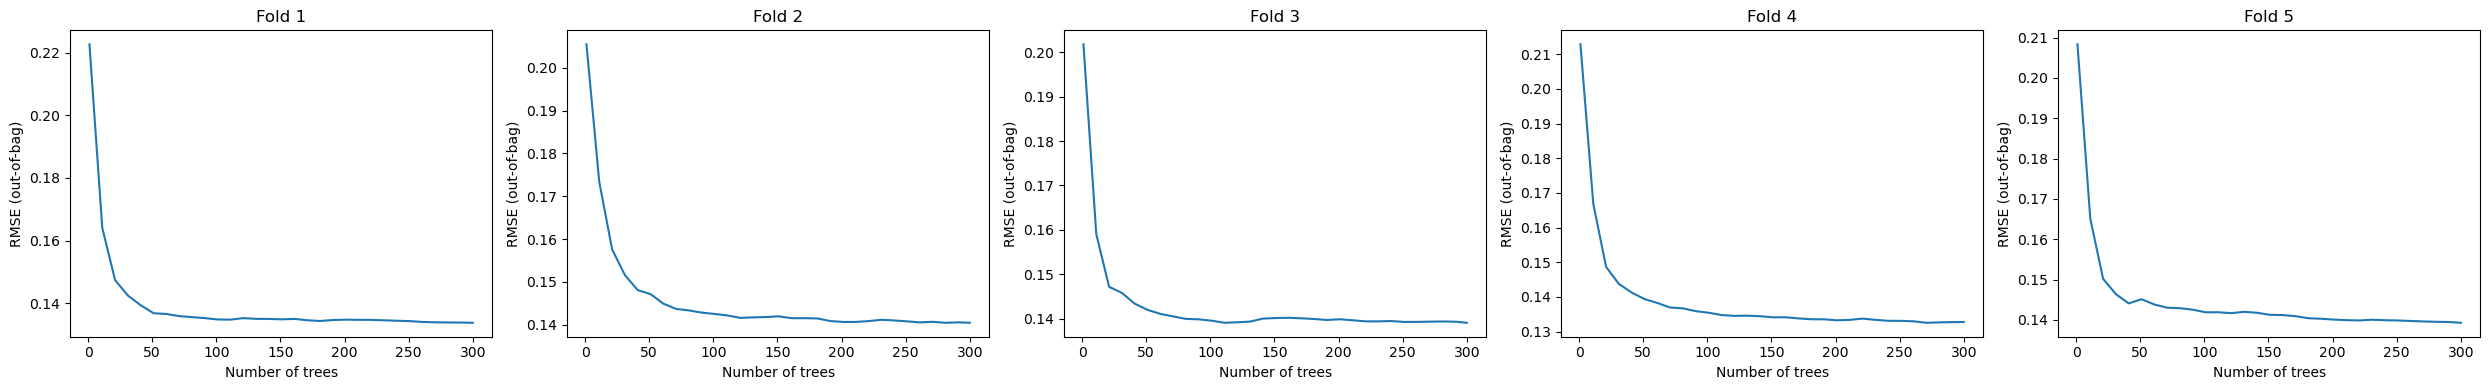

RMSE moyen sur 5 folds: 30558.62


In [102]:
from sklearn.model_selection import GroupKFold, KFold, GroupShuffleSplit, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error

# Paramètres
n_splits = 5
label = "SalePrice"

dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)
groups = dataset_df["Neighborhood"] 

y_binned = pd.qcut(dataset_df["SalePrice"], q=20, labels=False, duplicates="drop")
# X_rand = dataset_df_rand.drop(columns=["SalePrice"], axis=1)
# y_rand = dataset_df_rand["SalePrice"]

# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

# Initialiser KFold
# gss = GroupShuffleSplit(n_splits=n_splits, test_size=0.3)
# gkf = GroupKFold(n_splits=5)
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

rmse_scores = []

for i, (train_idx, test_idx) in enumerate(sgkf.split(dataset_df, y_binned, groups=groups)):
    df_train = dataset_df_rand.iloc[train_idx]
    df_test = dataset_df_rand.iloc[test_idx]

    # Convertir en tf.data.Dataset
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        df_train, label=label, task=tfdf.keras.Task.REGRESSION
    )
    test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        df_test, label=label, task=tfdf.keras.Task.REGRESSION
    )

    # Créer et entraîner le modèle
    model = tfdf.keras.RandomForestModel(
        hyperparameter_template="benchmark_rank1",    # num_trees ≈ 300 (plutôt modéré, pour éviter d’être trop lent).
                                                        # max_depth non limité (ou très grand, ex. 16+), donc les arbres poussent assez profond.
                                                        # min_examples ≈ 1 → feuilles très fines possibles (propension à l’overfit si les données sont bruitées).
                                                        # sampling_ratio ≈ 1.0 → chaque arbre voit ~100% des données (moins de bagging).
                                                        # num_candidate_attributes_ratio ≈ 1.0 → chaque split peut utiliser toutes les features disponibles.
                                                        # bootstrap = True.
        task=tfdf.keras.Task.REGRESSION,
        random_seed=42
    )


    
    # model = tfdf.keras.RandomForestModel(
    #         task=tfdf.keras.Task.REGRESSION,
    #         num_trees=500,                # Assez d’arbres pour la stabilité
    #         max_depth=12,                 # Empêche les arbres trop complexes
    #         min_examples=5,               # Pas de splits sur peu de données
    #         bootstrap_training_dataset=True,  # Ajoute de la diversité
    #         honest=True,                  # Honest estimation
    #         categorical_algorithm="RANDOM",  # Catégorielles plus robustes
    #         random_seed=42
    #     )
    
    # model = tfdf.keras.RandomForestModel(
    #         task=tfdf.keras.Task.REGRESSION,
    #         num_trees=500,                # Assez d’arbres pour la stabilité
    #         max_depth=12,                 # Empêche les arbres trop complexes
    #         min_examples=5,               # Pas de splits sur peu de données
    #         num_candidate_attributes_ratio = 0.8,  # chaque arbre voit 80% des features
    #         # honest=True,                  # Honest estimation
    #         # categorical_algorithm="RANDOM",  # Catégorielles plus robustes
    #         random_seed=42
    #     )
    model.fit(train_ds, verbose=0)

    train_pred_log = model.predict(train_ds)              # prédictions log du train
    train_pred_real = np.expm1(train_pred_log)              # retour à l’échelle réelle
    train_val_real = np.expm1(df_train['SalePrice'])
    rmse_train = np.sqrt(mean_squared_error(train_val_real, train_pred_real))
    
    test_pred_log = model.predict(test_ds)                # prédictions log du test
    test_pred_real = np.expm1(test_pred_log)
    test_val_real = np.expm1(df_test['SalePrice'])
    rmse_test = np.sqrt(mean_squared_error(test_val_real, test_pred_real))
    
    print("Quartiers en train :", dataset_df.loc[train_idx, "Neighborhood"].unique())
    print("Quartiers en test  :", dataset_df.loc[test_idx, "Neighborhood"].unique())
    print("Nombre d'échantillons train :", len(train_idx))
    print("Nombre d'échantillons test  :", len(test_idx))
    print(f"Fold {i+1} → RMSE Train: {rmse_train:.2f} | RMSE Test: {rmse_test:.2f}")
    
    rmse_scores.append(rmse_test)

    # Logs d’entraînement
    logs = model.make_inspector().training_logs()
    axes[i].plot(
        [log.num_trees for log in logs],
        [log.evaluation.rmse for log in logs]
    )
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print(f"RMSE moyen sur {n_splits} folds: {np.mean(rmse_scores):.2f}")

In [103]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [104]:
# tfdf.keras.get_all_models()

In [105]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [106]:
# rf.fit(x=train_ds)

In [107]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [108]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [110]:
# inspector.features()

In [111]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [115]:
inspector = model.make_inspector()
inspector.evaluation()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [116]:
print(inspector.variable_importances()["NUM_AS_ROOT"])


[("OverallQual" (1; #42), 154.0), ("GrLivArea" (1; #26), 49.0), ("Bath" (1; #3), 39.0), ("KitchenQual" (1; #29), 29.0), ("HouseAgeAtSale" (1; #27), 28.0), ("BsmtQual" (1; #11), 27.0), ("LotArea" (1; #30), 18.0), ("TotalBsmtSF" (1; #48), 18.0), ("ExterQual" (4; #15), 16.0), ("MiscVal" (1; #37), 16.0), ("TotRmsAbvGrd" (1; #47), 16.0), ("YearBuilt" (1; #51), 16.0), ("1stFlrSF" (1; #0), 14.0), ("BsmtCond" (1; #6), 14.0), ("Fireplaces" (1; #18), 14.0), ("GarageAgeAtSale" (1; #19), 13.0), ("PoolArea" (1; #43), 13.0), ("GarageArea" (1; #20), 12.0), ("GarageCond" (1; #22), 12.0), ("LowQualFinSF" (1; #32), 12.0), ("BsmtFinSF2" (1; #9), 9.0), ("GarageYrBlt" (1; #25), 9.0), ("KitchenAbvGr" (1; #28), 9.0), ("GarageFinish" (1; #23), 8.0), ("LotFrontage" (1; #31), 8.0), ("3SsnPorch" (1; #2), 7.0), ("GarageQual" (1; #24), 6.0), ("YearRemodAdd" (1; #52), 6.0), ("OpenPorchSF" (1; #40), 5.0), ("ScreenPorch" (1; #45), 5.0), ("WoodDeckSF" (1; #50), 5.0), ("2ndFlrSF" (1; #1), 4.0), ("EnclosedPorch" (1; #14

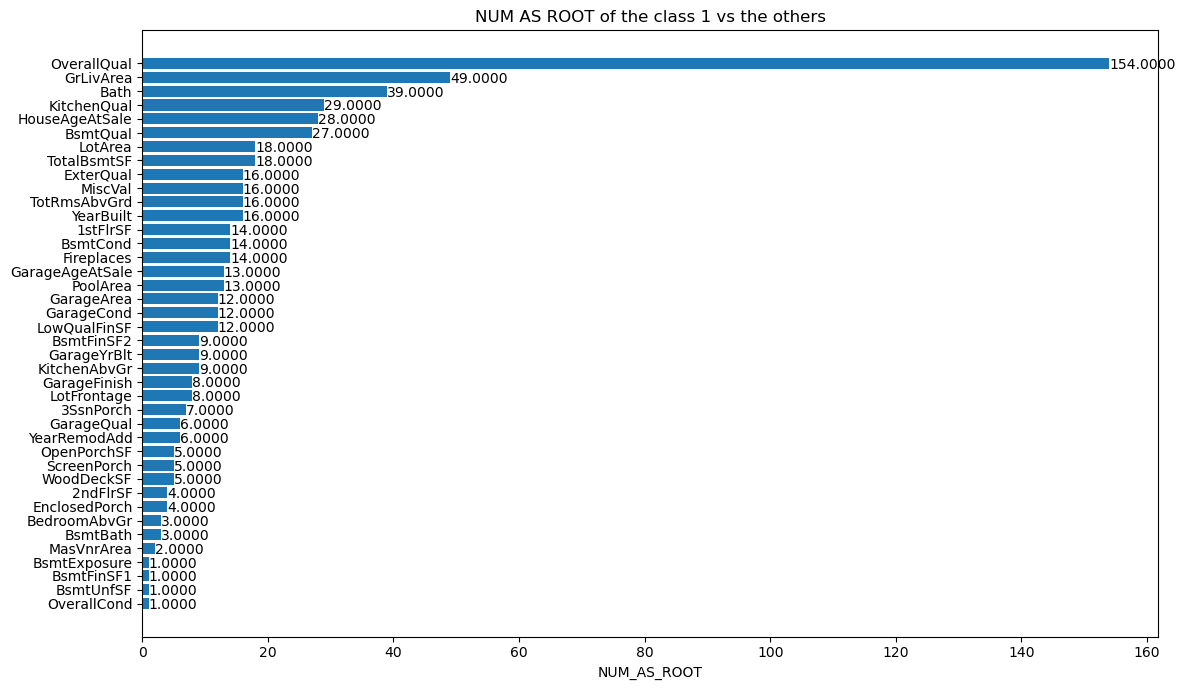

In [117]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [118]:
# Extraire toutes les importances
importances = inspector.variable_importances()

# On va récupérer seulement les 3 types qui nous intéressent
keys = ["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]

# Construire un DataFrame
dfs = []
for key in keys:
    data = []
    # importances[key] est une liste de tuples (feature, importance)
    for feat, imp in importances.get(key, []):
        if isinstance(feat, str):
            data.append((feat, imp))
        else:
            data.append((feat.name, imp))  # Sinon, on extrait son .name
    df = pd.DataFrame(data, columns=["Feature", key])
    dfs.append(df)

# Fusionner les 3 DataFrames
df_importances = dfs[0]
for df in dfs[1:]:
    df_importances = df_importances.merge(df, on="Feature", how="outer").fillna(0)

df_importances.sort_values("NUM_AS_ROOT", ascending=False).tail(10)

,Feature,NUM_AS_ROOT,SUM_SCORE,INV_MEAN_MIN_DEPTH
10,BsmtFinType1,0.0,92.010594,0.103941
13,CentralAir,0.0,199.700833,0.104191
17,Exterior2nd,0.0,158.158884,0.104197
16,Exterior1st,0.0,148.322872,0.104017
33,MSSubClass,0.0,320.729018,0.108962
21,GarageCars,0.0,694.778994,0.110056
38,Neighborhood,0.0,702.836463,0.115063
37,MoSold,0.0,343.002608,0.108007
34,MSZoning,0.0,77.428839,0.103378
44,Street,0.0,0.008063,0.101992


In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]] = scaler.fit_transform(
    df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]]
)

# Moyenne des 3 scores (ou pondération si tu veux privilégier un critère)
df_importances["Combined"] = df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]].mean(axis=1)

# Trier par importance combinée
df_importances = df_importances.sort_values("Combined", ascending=False)
df_importances.tail(15)

,Feature,NUM_AS_ROOT,SUM_SCORE,INV_MEAN_MIN_DEPTH,Combined
47,WoodDeckSF,0.032468,0.058602,0.057166,0.049412
4,BedroomAbvGr,0.019481,0.061837,0.064918,0.048745
14,EnclosedPorch,0.025974,0.059437,0.053941,0.046450
38,Neighborhood,0.000000,0.038918,0.055751,0.031556
12,BsmtUnfSF,0.006494,0.035529,0.043958,0.028660
21,GarageCars,0.000000,0.038471,0.034395,0.024289
7,BsmtExposure,0.006494,0.026553,0.035926,0.022991
33,MSSubClass,0.000000,0.017759,0.029730,0.015830
37,MoSold,0.000000,0.018993,0.025654,0.014882
13,CentralAir,0.000000,0.011058,0.009382,0.006813


In [120]:
# ['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
# 'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC']

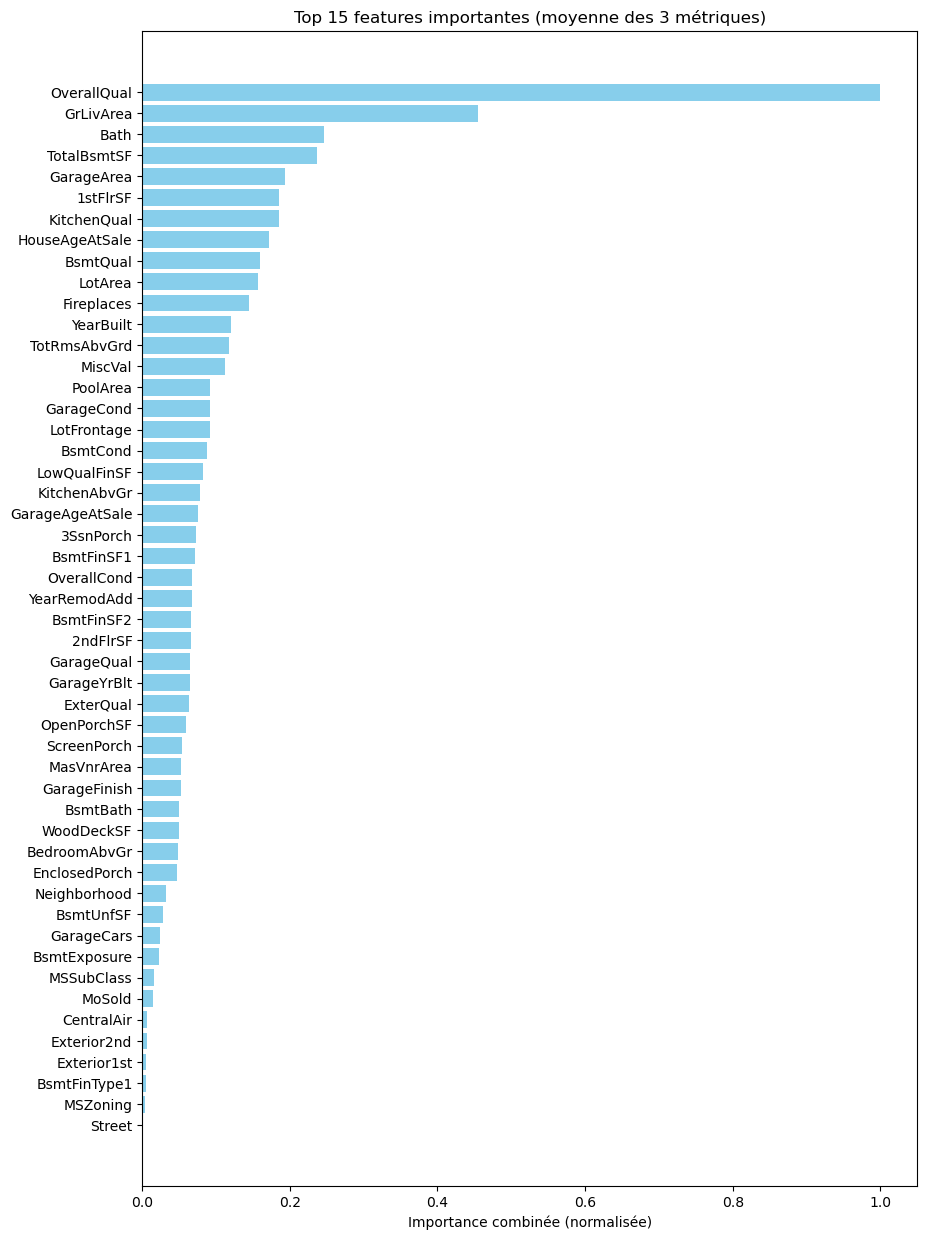

In [121]:
import matplotlib.pyplot as plt

top_features = df_importances.head(15)

plt.figure(figsize=(10,15))
plt.barh(df_importances["Feature"].astype(str), df_importances["Combined"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance combinée (normalisée)")
plt.title("Top 15 features importantes (moyenne des 3 métriques)")
plt.show()


In [122]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

test_data = test_data.drop(
    columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
    errors="ignore")

dataset_df = dataset_df.drop(
    columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
             'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
    errors="ignore")

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

full_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="SalePrice", task=tfdf.keras.Task.REGRESSION)
final_model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
final_model.fit(full_ds)


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmppwycf_p3 as temporary training directory
Reading training dataset...


/tmp/ipykernel_85154/1695608535.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_85154/1695608535.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_85154/1695608535.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

Training dataset read in 0:00:00.568001. Found 1460 examples.
Training model...


I0000 00:00:1757010126.656398   85154 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757010126.656504   85154 kernel.cc:783] Collect training examples
I0000 00:00:1757010126.656542   85154 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757010126.656715   85154 kernel.cc:401] Number of batches: 2
I0000 00:00:1757010126.656723   85154 kernel.cc:402] Number of examples: 1460
I0000 00:00:1757010126.658220   85154 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column MSSubClass (14 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757010126.658343   85154 data_spec_inference.cc:354] 1 item(s) have been p

Model trained in 0:00:06.904219
Compiling model...


I0000 00:00:1757010133.507119   85154 decision_forest.cc:808] Model loaded with 300 root(s), 138594 node(s), and 49 input feature(s).
I0000 00:00:1757010133.507248   85154 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-09-04 18:22:13.507288: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [123]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = final_model.predict(test_ds)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.expm1(x))
sample_submission_df.to_csv('../submissions/submission12.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 2s 67ms/step


,Id,SalePrice
0,1461,122754.150768
1,1462,152339.607278
2,1463,178887.791493
3,1464,183603.222978
4,1465,194871.062724


In [124]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission11_retrain_model_on_full_DS.csv -m "11th try: retrain model on full DS "